In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!unzip gdrive/MyDrive/GhazalDataset.zip

In [ ]:
import csv
import glob
import pandas as pd
import os
import numpy as np

In [ ]:
# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!pip install hazm

In [ ]:
!pip install --upgrade tensorflow

In [ ]:
dirpath = "./GhazalDataset"
outputpath = 'datasetcsv.csv'
columns_name =["poem","poet"]
output = open(outputpath,'w')
csvout = csv.DictWriter(output,columns_name)
csvout.writeheader()
folders_name = os.listdir(dirpath);

for folder in folders_name:
  # print(folder)
  files = os.listdir(dirpath + '/' + folder)
  # print(files)

  for f in files :
    with open(dirpath + '/' + folder + '/' + f,encoding="utf8",errors="ignore")as afile:
      text_file = afile.read().replace('\n',' ')
      row = {'poem': text_file,'poet': folder}
      csvout.writerow(row)
output.close()

In [ ]:
df = pd.read_csv('datasetcsv.csv')
df

,poem,poet
0,در عشق روی او ز حدوث و قدم مپرس گر مرد عاشقی ...,attar
1,عشق توام داغ چنان می‌کند کآتش سوزنده فغان می‌...,attar
2,قصهٔ عشق تو چون بسیار شد قصه‌گویان را زبان از...,attar
3,آن روی به جز قمر که آراید وان لعل به جز شکر ک...,attar
4,دل ز جان برگیر تا راهت دهند ملک دو عالم به یک...,attar
...,...,...
2426,خم زلف تو دام کفر و دین است ز کارستان او یک ش...,hafez
2427,عکس روی تو چو در آینه جام افتاد عارف از خنده ...,hafez
2428,ستاره‌ای بدرخشید و ماه مجلس شد دل رمیده ما را...,hafez
2429,ای آفتاب آینه دار جمال تو مشک سیاه مجمره گردا...,hafez


In [ ]:
# print missing values information
print('missing values stats')
print(df.isnull().sum(), '\n')

# print some missing values
print('some missing values')
print(df[df['poem'].isnull()], '\n')

missing values stats
poem    0
poet    0
dtype: int64 

some missing values
Empty DataFrame
Columns: [poem, poet]
Index: [] 



In [ ]:
import re
import hazm

In [ ]:
normalizer = hazm.Normalizer()
def cleaning(text):
    text = text.strip()
    # normalizing
    text = normalizer.normalize(text)

    # replacing all spaces,hyphens, with white space
    space_pattern = r"[\xad\ufeff\u200e\u200d\u200b\x7f\u202a\u2003\xa0\u206e\u200c\x9d\]]"
    space_pattern = re.compile(space_pattern)
    text = space_pattern.sub(" ", text)

    # let's delete the un-required elements
    deleted_pattern = r"(\d|[\|\[]]|\"|'ٍ|[0-9]|¬|[a-zA-Z]|[؛“،,”‘۔’’‘–]|[|\.÷+\:\-\?»\=\{}\*«_…\؟!/ـ]|[۲۹۱۷۸۵۶۴۴۳]|[\\u\\x]|[\(\)]|[۰'ٓ۫'ٔ]|[ٓٔ]|[ًٌٍْﹼ،َُِّ«ٰ»ٖء]|\[]|\[\])"
    deleted_pattern = re.compile(deleted_pattern)
    text = deleted_pattern.sub("", text).strip()


    # removing wierd patterns
    wierd_pattern = re.compile("["
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u'\U00010000-\U0010ffff'
        u"\u200d"
        u"\u200c"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\u3030"
        u"\ufe0f"
        u"\u2069"
        u"\u2066"
        u"\u2068"
        u"\u2067"
        "]+", flags=re.UNICODE)

    text = wierd_pattern.sub(r'', text)
    # removing extra spaces, hashtags
    text = re.sub("#", "", text)
    text = re.sub("\s+", " ", text)
    return text

df['cleaned_poems'] = df['poem'].apply(cleaning)
df = df[['cleaned_poems', 'poet']]
df.columns = ['poem', 'poet']
df

,poem,poet
0,در عشق روی او ز حدوث و قدم مپرس گر مرد عاشقی ز...,attar
1,عشق توام داغ چنان می کند کآتش سوزنده فغان می ک...,attar
2,قصه عشق تو چون بسیار شد قصه گویان را زبان از ک...,attar
3,آن روی به جز قمر که آراید وان لعل به جز شکر که...,attar
4,دل ز جان برگیر تا راهت دهند ملک دو عالم به یک ...,attar
...,...,...
2426,خم زلف تو دام کفر و دین است ز کارستان او یک شم...,hafez
2427,عکس روی تو چو در آینه جام افتاد عارف از خنده م...,hafez
2428,ستاره ای بدرخشید و ماه مجلس شد دل رمیده ما را ...,hafez
2429,ای آفتاب آینه دار جمال تو مشک سیاه مجمره گردان...,hafez


In [ ]:
labels = list(sorted(df['poet'].unique()))
labels

['attar', 'hafez', 'moulavi', 'saadi', 'sanaee']

In [ ]:
df['label_id'] = df['poet'].apply(lambda t: labels.index(t))
df

,poem,poet,label_id
0,در عشق روی او ز حدوث و قدم مپرس گر مرد عاشقی ز...,attar,0
1,عشق توام داغ چنان می کند کآتش سوزنده فغان می ک...,attar,0
2,قصه عشق تو چون بسیار شد قصه گویان را زبان از ک...,attar,0
3,آن روی به جز قمر که آراید وان لعل به جز شکر که...,attar,0
4,دل ز جان برگیر تا راهت دهند ملک دو عالم به یک ...,attar,0
...,...,...,...
2426,خم زلف تو دام کفر و دین است ز کارستان او یک شم...,hafez,1
2427,عکس روی تو چو در آینه جام افتاد عارف از خنده م...,hafez,1
2428,ستاره ای بدرخشید و ماه مجلس شد دل رمیده ما را ...,hafez,1
2429,ای آفتاب آینه دار جمال تو مشک سیاه مجمره گردان...,hafez,1


In [ ]:
def stop_word_importer(file_name):# importing persian stopwords
    with open(file_name, 'r', encoding="utf8") as myfile:
        stop_words = myfile.read().replace('\n', ' ').replace("\u200c","").replace("\ufeff","").replace("."," ").split(' ')# a list of stop words
    return stop_words

In [ ]:
stop_words = stop_word_importer('stop_words.txt') # importing stop words to a list

In [ ]:
from hazm import stopwords_list

def removeStopWords(text):
  text = ' '.join([word for word in text.split() if word not in stopwords_list()])
  text = ' '.join([word for word in text.split() if word not in stop_words])
  return text

df['cleaned_poems'] = df['poem'].apply(removeStopWords)
df = df[['cleaned_poems', 'poet']]
df.columns = ['poem', 'poet']
df


,poem,poet
0,عشق حدوث قدم مپرس مرد عاشقی مپرس بگذر ازل ابد ...,attar
1,عشق توام داغ کآتش سوزنده فغان دل دل آتش بسوخت ...,attar
2,قصه عشق قصه زبان کار قصه ره فراوان دین ره دشوا...,attar
3,قمر آراید وان لعل شکر فرساید جان پرده جهان افت...,attar
4,دل جان برگیر راهت ملک عالم آهت برگیری دل جان م...,attar
...,...,...
2426,خم زلف دام کفر دین کارستان شمه جمالت معجز حسن ...,hafez
2427,عکس آینه جام افتاد عارف خنده طمع خام افتاد حسن...,hafez
2428,ستاره بدرخشید ماه مجلس دل رمیده رفیق مونس نگار...,hafez
2429,آفتاب آینه جمال مشک مجمره گردان خال صحن سرای ب...,hafez


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from keras.models import Sequential
from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
# from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
# from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping

In [ ]:
from keras.utils import pad_sequences

In [ ]:
MAX_NB_WORDS = 10000
MAX_SEQUENCE_LENGTH = 256
EMBEDDING_DIM = 100
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~')
tokenizer.fit_on_texts(df['poem'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 21126 unique tokens.


In [ ]:
X = tokenizer.texts_to_sequences(df['poem'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (2431, 256)


In [ ]:
Y = pd.get_dummies(df['poet']).values
print('Shape of label tensor:', Y.shape)

Shape of label tensor: (2431, 5)


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.20, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(1944, 256) (1944, 5)
(487, 256) (487, 5)


In [ ]:
import tensorflow as tf
loss = tf.keras.losses.CategoricalCrossentropy()

In [ ]:
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(5, activation='softmax'))
model.compile(loss=loss, optimizer='adam', metrics=['accuracy'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 256, 100)          1000000   
                                                                 
 spatial_dropout1d (SpatialD  (None, 256, 100)         0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 5)                 505       
                                                                 
Total params: 1,080,905
Trainable params: 1,080,905
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
epochs = 10
batch_size = 32

history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1, callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Epoch 1/10
55/55 [==============================] - 87s 1s/step - loss: 1.4848 - accuracy: 0.4740 - val_loss: 1.1890 - val_accuracy: 0.6872
Epoch 2/10
55/55 [==============================] - 78s 1s/step - loss: 0.8143 - accuracy: 0.7913 - val_loss: 0.6957 - val_accuracy: 0.8359
Epoch 3/10
55/55 [==============================] - 79s 1s/step - loss: 0.2958 - accuracy: 0.9434 - val_loss: 0.4153 - val_accuracy: 0.8974
Epoch 4/10
55/55 [==============================] - 74s 1s/step - loss: 0.1106 - accuracy: 0.9891 - val_loss: 0.2602 - val_accuracy: 0.9282
Epoch 5/10
55/55 [==============================] - 72s 1s/step - loss: 0.0877 - accuracy: 0.9851 - val_loss: 0.3519 - val_accuracy: 0.8974
Epoch 6/10
55/55 [==============================] - 77s 1s/step - loss: 0.0343 - accuracy: 0.9977 - val_loss: 0.3083 - val_accuracy: 0.9026
Epoch 7/10
55/55 [==============================] - 72s 1s/step - loss: 0.0223 - accuracy: 0.9983 - val_loss: 0.2441 - val_accuracy: 0.9179
Epoch 8/10
55/55 [==

In [ ]:
accr = model.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

16/16 [==============================] - 1s 74ms/step - loss: 0.2401 - accuracy: 0.9220
Test set
  Loss: 0.240
  Accuracy: 0.922


In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

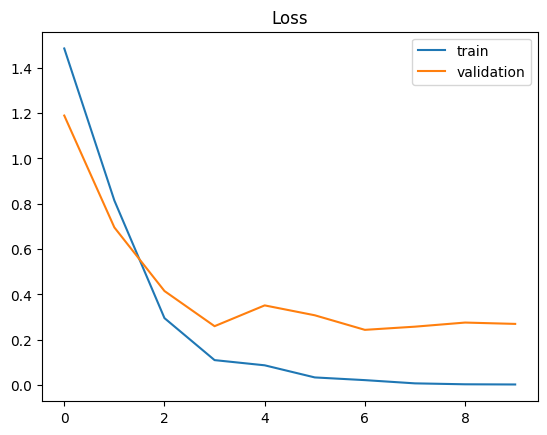

In [ ]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.legend()
plt.show();

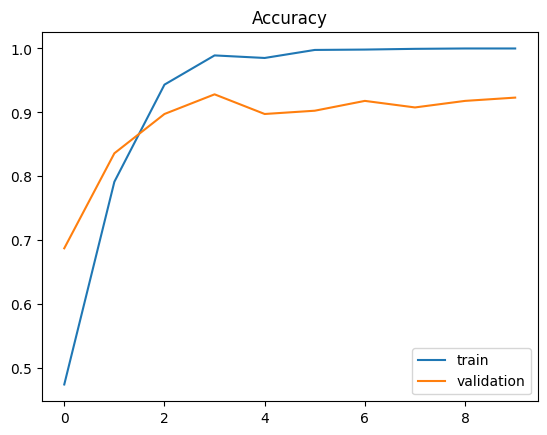

In [ ]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation')
plt.legend()
plt.show();

In [ ]:
predictions = model.predict(X_test)
predictions.tolist()

In [ ]:
labelsdf = pd.DataFrame(Y_test)

In [ ]:
ldf = pd.from_dummies(labelsdf)
ldf = ldf.values.tolist()
ldf

In [ ]:
Y_pred = predictions.argmax(axis=-1).tolist()
Y_pred

In [ ]:
from sklearn.metrics import classification_report

print()
print(classification_report(ldf, Y_pred, target_names=labels))
print()


              precision    recall  f1-score   support

       attar       0.96      0.95      0.96       111
       hafez       0.87      0.99      0.92        79
     moulavi       0.94      0.82      0.88       104
       saadi       0.95      0.96      0.96       102
      sanaee       0.87      0.90      0.89        91

    accuracy                           0.92       487
   macro avg       0.92      0.92      0.92       487
weighted avg       0.92      0.92      0.92       487




In [ ]:
from sklearn.metrics import f1_score
print(f'F1: {f1_score(ldf, Y_pred, average="weighted")}')

F1: 0.9214146961816547


<Axes: >

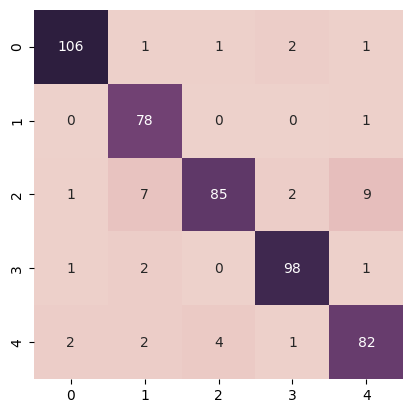

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sb
matrix_confusion = confusion_matrix(ldf, Y_pred)
sb.heatmap(matrix_confusion, square=True, annot=True, cmap=sb.cubehelix_palette(as_cmap=True)
, fmt='d', cbar=False)

In [ ]:
str = "دوش از وثاق دلبری سرمست بیرون آمدم هیچم نبود از خود خبر تا بی خبر چون آمدم دستم چو از نیرنگ او آمد به زیر سنگ او بر چهرهٔ گلرنگ او چون لاله در خون آمدم گاهی ز جان بی جان شدم گاهی ز دل بریان شدم هر لحظه دیگر سان شدم هر دم دگرگون آمدم در فرقت آن نازنین گشتم همه روی زمین گویی نبودم پیش ازین عاشق هم اکنون آمدم چون نیستی اندر عیان، در نیستی گشتم نهان تا هرچه دیدم در جهان از جمله بیرون آمدم از فقر رو کردم سیه عطار را کردم تبه رفعت رها کردم به ره از خویش بیرون آمدم"


In [ ]:
df1 = pd.DataFrame(columns=['poem', 'poet'])
df1.loc[0] = [str, "saadi"]
df1

,poem,poet
0,دوش از وثاق دلبری سرمست بیرون آمدم هیچم نبود ا...,saadi


In [ ]:
id_label_map = {
    "attar": 0,
    "hafez": 1,
    "moulavi": 2,
    "saadi": 3,
    "sanaee": 4
}
df1['poet'] = df1['poet'].map(id_label_map)
df1

,poem,poet
0,دوش از وثاق دلبری سرمست بیرون آمدم هیچم نبود ا...,3


In [ ]:
df1.loc[0].values

array(['دوش از وثاق دلبری سرمست بیرون آمدم هیچم نبود از خود خبر تا بی خبر چون آمدم دستم چو از نیرنگ او آمد به زیر سنگ او بر چهرهٔ گلرنگ او چون لاله در خون آمدم گاهی ز جان بی جان شدم گاهی ز دل بریان شدم هر لحظه دیگر سان شدم هر دم دگرگون آمدم در فرقت آن نازنین گشتم همه روی زمین گویی نبودم پیش ازین عاشق هم اکنون آمدم چون نیستی اندر عیان، در نیستی گشتم نهان تا هرچه دیدم در جهان از جمله بیرون آمدم از فقر رو کردم سیه عطار را کردم تبه رفعت رها کردم به ره از خویش بیرون آمدم',
       3], dtype=object)

In [ ]:
df1['cleaned_poem'] = df1['poem'].apply(cleaning)
df1 = df1[['cleaned_poem', 'poet']]
df1.columns = ['poem', 'poet']
df1

,poem,poet
0,دوش از وثاق دلبری سرمست بیرون آمدم هیچم نبود ا...,3


In [ ]:
df1['cleaned_poem'] = df1['poem'].apply(removeStopWords)
df1 = df1[['cleaned_poem', 'poet']]
df1.columns = ['poem', 'poet']
df1

,poem,poet
0,دوش وثاق دلبری سرمست آمدم هیچم خبر خبر آمدم دس...,3


In [ ]:
X_new = tokenizer.texts_to_sequences(df1['poem'].values)
X_new = pad_sequences(X_new, maxlen=MAX_SEQUENCE_LENGTH)

In [ ]:
prediction = model.predict(X_new)

1/1 [==============================] - 0s 167ms/step


In [ ]:
prediction.tolist()

[[0.9872599840164185,
  0.0015880328137427568,
  0.0021732046734541655,
  0.0043900590389966965,
  0.004588779993355274]]

In [ ]:
Y_new_pred= prediction.argmax(axis=-1).tolist()
Y_new_pred

[0]

In [ ]:
idToLabel = [ "attar",
    "hafez",
    "moulavi",
    "saadi",
    "sanaee"]

print(idToLabel[Y_new_pred[0]])


attar
